In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. We’re going to use matrices to pass through multiple inputs at once. Doing this allows for big computational speedups. 


Our input data matrix, X, is of dimension 3 by 2, because we have 3, 2-dimensional examples. Our corresponding output data, y, is of dimension 3 by 1.

W (3,3) X (3,2) --> y (3,1)

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        # hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hidderLayerSize = 3
        
    def forward(self, X):
        # propagate inputs though network

Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron.

From here on out, we'll refer to these matrics as X, W one, and z two, where z two the activity of our second layer. Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit. 

$z^{(2)} = XW^{(1)}$. Matrix notation is really nice here, the underlying process in a single line!

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$

In [4]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

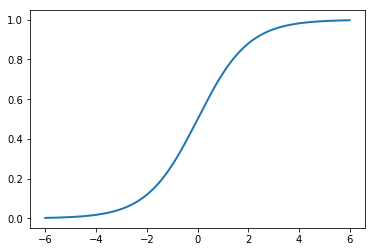

In [15]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)

 We now have our second formula for forward propagation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

To finish forward propagation we need to propagate a two all the way to the output, yhat. Multiplying a2, by W2, z3 has three activity values, one for each example. We'll apply our activation function to z three yielding our official estimate of your test score, yHat.

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$


We need to implement our forward propagation formulas in python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers. 
We'll implement forward propagation in our forward method, using numpy's built in dot method for matrix multiplication and our own sigmoid method.

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

## 4 - Forward propagation module

### 4.1 - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Exercise**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

### 4.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

- **SoftMax**: $\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}$. We have provided you with the `softmax` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = softmax(Z)
```
